In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Define variables of the task:

## Variables of the experiment are set: number of trials in each block, reward ratio pairs, number of blocks

In [8]:
n_trials_base=80; # number of trials in a block
n_trials_sd=10; # +- randomization of trial blocks

reward_ratio_pairs=[[.4,.05],[.3857,.0643],[.3375,.1125]] # from Bari-Cohen 2019
blocknum = 20 # number of blocks
p_reward_L=[.225] # the first block is set to 50% reward rate
p_reward_R=[.225] # the first block is set to 50% reward rate
for i in range(blocknum): # reward rate pairs are chosen randomly
    ratiopairidx=np.random.choice(range(len(reward_ratio_pairs)))
    reward_ratio_pair=reward_ratio_pairs[ratiopairidx]
    np.random.shuffle(reward_ratio_pair)
    p_reward_L.append(reward_ratio_pair[0])
    p_reward_R.append(reward_ratio_pair[1])


#p_reward_L = [.1 ,.3,.1,.5] # probabilities of getting reward on choosing left
#p_reward_R = [.3,.1,.5,.1] # probabilities of getting reward on choosing right
n_trials = np.round(np.random.normal(0,n_trials_sd,len(p_reward_L)) + n_trials_base).astype(int)# number of trials in each block


print('probability of reward on R:',p_reward_R)
print('probability of reward on L:',p_reward_L)
print('trialnum in each block: ', n_trials)

probability of reward on R: [0.225, 0.4, 0.05, 0.4, 0.4, 0.0643, 0.05, 0.05, 0.4, 0.0643, 0.1125, 0.4, 0.1125, 0.3857, 0.4, 0.3375, 0.0643, 0.4, 0.1125, 0.3857, 0.0643]
probability of reward on L: [0.225, 0.05, 0.4, 0.05, 0.05, 0.3857, 0.4, 0.4, 0.05, 0.3857, 0.3375, 0.05, 0.3375, 0.0643, 0.05, 0.1125, 0.3857, 0.05, 0.3375, 0.0643, 0.3857]
trialnum in each block:  [ 76  59  83  92  70  75  87  77  98  79  83  87  88 101  79  77  76  74
  72  74  77]


### Two types of biphasic time-dependent weighting kernels can be used: one which uses the choice history (only_rewarded = False) and one which uses the reward history (only_rewarded = True)

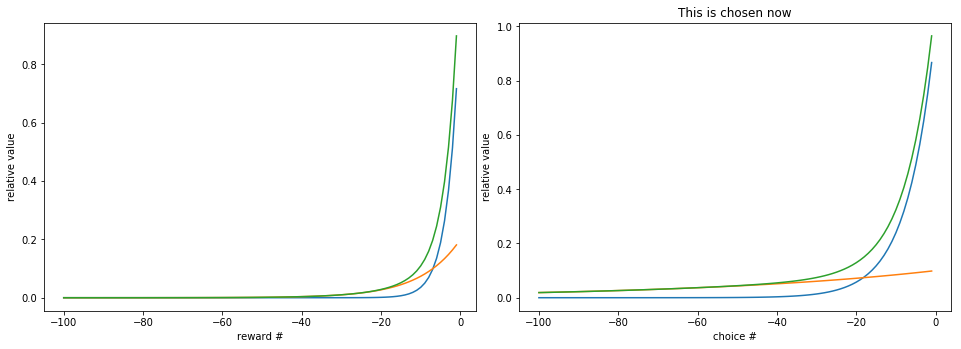

In [9]:
only_rewarded = False

tau_rewardnum_only_rewarded = 20 # for boxcar
tau_choicenum_only_rewarded = 3 # for smooth
tau_choicenum_slow_only_rewarded = 10 # for smooth
tau_fast_slow_amplituderatio_only_rewarded = 5

tau_rewardnum_all_choices = 20 # for boxcar
tau_choicenum_all_choices = 7 # for smooth
tau_choicenum_slow_all_choices = 60 # for smooth
tau_fast_slow_amplituderatio_all_choices = 10
    
x=np.arange(100,0,-1)
yfast_only_rewarded=np.exp(-x/tau_choicenum_only_rewarded)
yslow_only_rewarded=np.exp(-x/tau_choicenum_slow_only_rewarded)/tau_fast_slow_amplituderatio_only_rewarded
y_only_rewarded=yfast_only_rewarded+yslow_only_rewarded
yfast_all_choices=np.exp(-x/tau_choicenum_all_choices)
yslow_all_choices=np.exp(-x/tau_choicenum_slow_all_choices)/tau_fast_slow_amplituderatio_all_choices
y_all_choices=yfast_all_choices+yslow_all_choices

fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])
ax1.plot(range(-100,0),yfast_only_rewarded[-100:],range(-100,0),yslow_only_rewarded[-100:],range(-100,0),y_only_rewarded[-100:])
plt.xlabel('reward #')
plt.ylabel('relative value')
if only_rewarded:
    plt.title('This is chosen now')
    

ax2=fig.add_axes([1.1,0,1,1])
ax2.plot(range(-100,0),yfast_all_choices[-100:],range(-100,0),yslow_all_choices[-100:],range(-100,0),y_all_choices[-100:])
plt.xlabel('choice #')
plt.ylabel('relative value')
if not only_rewarded:
    plt.title('This is chosen now')
    
    
if only_rewarded:
    tau_rewardnum = tau_rewardnum_only_rewarded # for boxcar
    tau_choicenum = tau_choicenum_only_rewarded # for smooth
    tau_choicenum_slow = tau_choicenum_slow_only_rewarded # for smooth
    tau_fast_slow_amplituderatio = tau_fast_slow_amplituderatio_only_rewarded
else:
    tau_rewardnum = tau_rewardnum_all_choices # for boxcar
    tau_choicenum = tau_choicenum_all_choices # for smooth
    tau_choicenum_slow = tau_choicenum_slow_all_choices # for smooth
    tau_fast_slow_amplituderatio = tau_fast_slow_amplituderatio_all_choices

## Simulation: - reward can be reassigned on every trial (unchosen_rewards_to_keep = 0) or the last x unclaimed rewards can be given automatically (unchosen_rewards_to_keep = x)


expected  L:  [0.225, 0.05, 0.4, 0.05, 0.05, 0.3857, 0.4, 0.4, 0.05, 0.3857, 0.3375, 0.05, 0.3375, 0.0643, 0.05, 0.1125, 0.3857, 0.05, 0.3375, 0.0643, 0.3857]
actual    L:  [0.4103 0.2    0.5636 0.2381 0.2222 0.4746 0.4267 0.3947 0.1538 0.449
 0.377  0.1    0.3793 0.125  0.5    0.5    0.561  0.2105 0.3784 0.2121
 0.4762]
expected  R:  [0.225, 0.4, 0.05, 0.4, 0.4, 0.0643, 0.05, 0.05, 0.4, 0.0643, 0.1125, 0.4, 0.1125, 0.3857, 0.4, 0.3375, 0.0643, 0.4, 0.1125, 0.3857, 0.0643]
actual    R:  [0.2973 0.5897 0.25   0.493  0.4231 0.0625 0.3333 1.     0.4237 0.1333
 0.2273 0.3684 0.1186 0.3656 0.3506 0.2958 0.2286 0.6111 0.1714 0.4878
 0.1429]
maximal R+L:  [0.225  0.4    0.4    0.4    0.4    0.3857 0.4    0.4    0.4    0.3857
 0.3375 0.4    0.3375 0.3857 0.4    0.3375 0.3857 0.4    0.3375 0.3857
 0.3857]
actual  R+L:  [0.3553 0.4576 0.4578 0.4348 0.3714 0.3867 0.4138 0.4026 0.3163 0.3291
 0.3373 0.2759 0.2045 0.3465 0.3544 0.3117 0.4079 0.4054 0.2778 0.3649
 0.4156]


0.36104513064133015

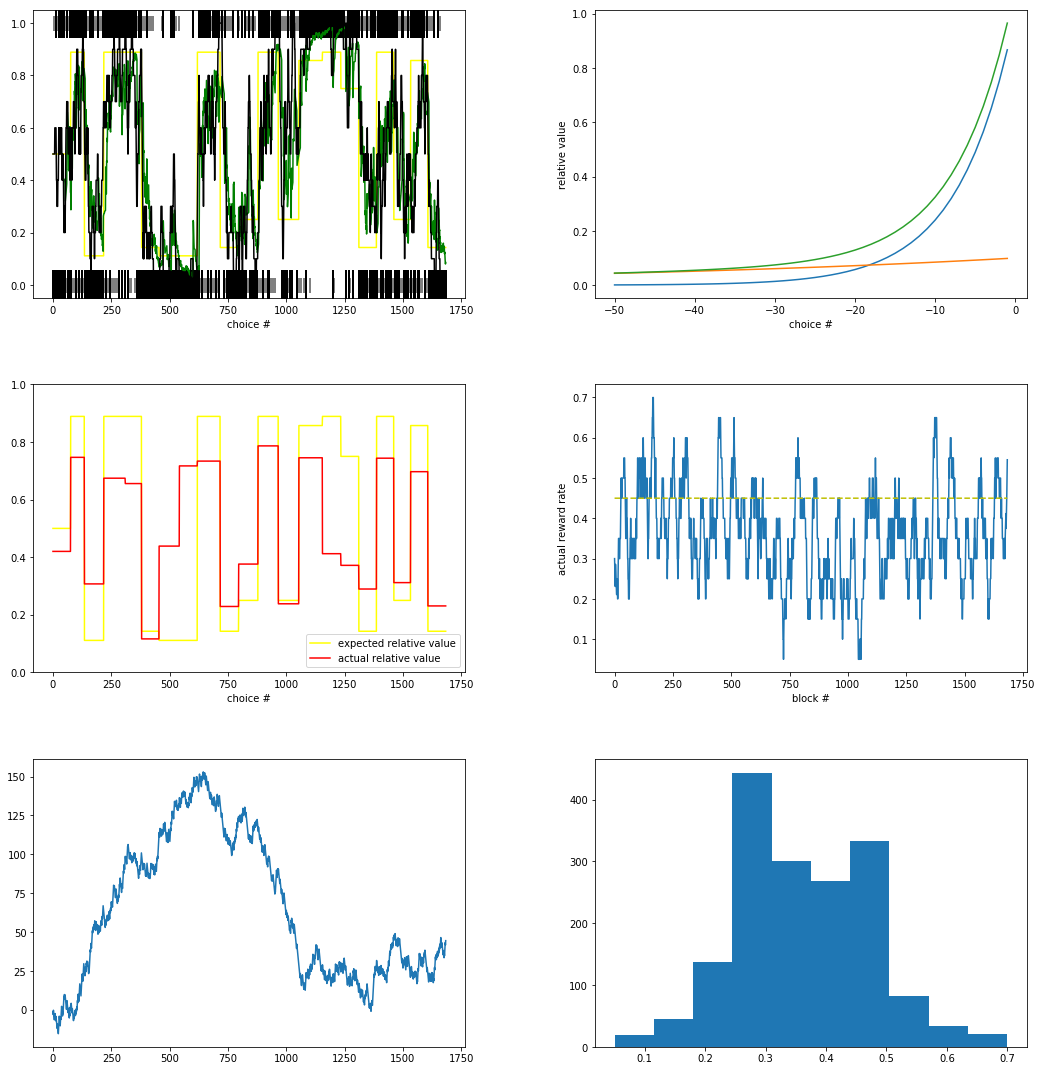

In [48]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n



unchosen_rewards_to_keep = 1 # set to 0 for real probabilities

subject = 'clever mouse'#'perfect'#'random' #'clever mouse'#'perfect'#('clever mouse' / 'random' / 'perfect' )

accumulated_rewards_L = 0
accumulated_rewards_R = 0

history_choice = np.array([],dtype=int)#1 is right, 0 is left
history_reward = np.full(0,True,dtype=bool)
history_rewardrate_constant=np.array([])#1 is right, 0 is left
history_rewardrate_dynamic=np.array([])#1 is right, 0 is left
for blocknum in range(len(p_reward_L)):
    for i_trial in range(n_trials[blocknum]):
        rewardrate_constant=(p_reward_R[blocknum])/(p_reward_R[blocknum]+p_reward_L[blocknum])#/2+.5; # current flat reward rate
        history_rewardrate_constant=np.append(history_rewardrate_constant,rewardrate_constant)
        
        if len(history_choice) < tau_choicenum or sum(history_reward == True) < tau_rewardnum:
            choice=np.random.choice(['left','right']) # this will be given by the model
            history_rewardrate_dynamic=np.append(history_rewardrate_dynamic,[np.NaN])
        else:
            
            if only_rewarded:
                x=np.arange(sum(history_reward),0,-1)
                yfast=np.exp(-x/tau_choicenum)
                yslow=np.exp(-x/tau_choicenum_slow)/tau_fast_slow_amplituderatio
                y=yfast+yslow
                history_reward_local=y
                history_choice_local=history_choice[history_reward == True]
            else:
                x=np.arange(len(history_choice),0,-1)
                yfast=np.exp(-x/tau_choicenum)
                yslow=np.exp(-x/tau_choicenum_slow)/tau_fast_slow_amplituderatio
                y=yfast + yslow
                history_reward_local=history_reward*y
                history_choice_local=history_choice
            
            rewardrate_left=np.mean(history_reward_local[history_choice_local==0])
            rewardrate_right=np.mean(history_reward_local[history_choice_local==1])
            rewardrate_dynamic=(rewardrate_right)/(rewardrate_right+rewardrate_left)
            history_rewardrate_dynamic=np.append(history_rewardrate_dynamic,[rewardrate_dynamic])
            
            if subject == 'random':
                rewardrate_dynamic = .5
            
            if np.random.uniform(0,1)<=rewardrate_dynamic:
                choice='right'
            else:
                choice='left'
            if subject == 'perfect': # this one knows the probabilities and the accumulated reward
                if p_reward_R[blocknum]>p_reward_L[blocknum]:
                    if accumulated_rewards_R > accumulated_rewards_L: # go for the right
                        choice='right'
                    elif accumulated_rewards_L > accumulated_rewards_R: # go for the left
                        choice='left'
                    else:
                        choice='right'
                else:
                    if accumulated_rewards_L > accumulated_rewards_R: # go for the left
                        choice='left'
                    elif accumulated_rewards_R > accumulated_rewards_L: # go for the right
                        choice='right'
                    else:
                        choice='left'

        if choice == 'right':
            prob=p_reward_R[blocknum]
            accumulated_rewards = accumulated_rewards_R
            accumulated_rewards_R = 0
            history_choice=np.append(history_choice,[1])
            if accumulated_rewards_L < unchosen_rewards_to_keep and np.random.uniform(0,1)<p_reward_L[blocknum]:
                accumulated_rewards_L += 1
        else:
            prob=p_reward_L[blocknum]
            accumulated_rewards = accumulated_rewards_L
            accumulated_rewards_L = 0
            history_choice=np.append(history_choice,[0])
            if accumulated_rewards_R < unchosen_rewards_to_keep and np.random.uniform(0,1) < p_reward_R[blocknum]:
                accumulated_rewards_R += 1
            
        if np.random.uniform(0,1)<prob or accumulated_rewards:
            reward = True
        else:
            reward = False   
        history_reward=np.append(history_reward,[reward])

        
        
history_choicenum = np.arange(0,len(history_choice))
fig=plt.figure()
ax1=fig.add_axes([0,0,1,1])
ax1.plot(history_choicenum[history_reward==False], history_choice[history_reward==False],'|',color='gray',markersize=15,markeredgewidth=2)
ax1.plot(history_choicenum[history_reward==True], history_choice[history_reward==True],'k|',color='black',markersize=30,markeredgewidth=2)
# constant reward rate
ax1.plot(history_choicenum,history_rewardrate_constant,color='yellow')
#ax1.plot(history_choicenum,history_rewardrate_constant_actual,color='red')
ax1.plot(history_choicenum,history_rewardrate_dynamic,color='green')   
ax1.plot(moving_average(history_choice,10),color='black')

plt.xlabel('choice #')

ax2=fig.add_axes([1.3,0,1,1])
ax2.plot(range(-50,0),yfast[-50:],range(-50,0),yslow[-50:],range(-50,0),y[-50:])
plt.xlabel('choice #')
plt.ylabel('relative value')


# calculating actual rewardrates
block_idx_edges = np.concatenate((np.array([0]),np.cumsum(n_trials[:len(n_trials)])))
history_rewardrate_constant_actual = np.zeros(len(history_rewardrate_constant))
p_reward_L_actual =np.zeros(len(p_reward_L))
p_reward_R_actual =np.zeros(len(p_reward_R))
p_reward_maximal =np.zeros(len(p_reward_R))
p_reward_actual =np.zeros(len(p_reward_R))

for blocki, blocknum in enumerate(n_trials):
    idxnow=range(block_idx_edges[blocki],block_idx_edges[blocki+1])
    choices_block = history_choice[idxnow]
    rewards_block = history_reward[idxnow]
    rewardrate_L = np.around(np.mean(rewards_block[choices_block == 0]),4)
    rewardrate_R = np.around(np.mean(rewards_block[choices_block == 1]),4)  
    history_rewardrate_constant_actual[idxnow] = rewardrate_R/(rewardrate_R+rewardrate_L)
    p_reward_L_actual[blocki] = rewardrate_L
    p_reward_R_actual[blocki] = rewardrate_R
    p_reward_maximal[blocki] = np.max([p_reward_L[blocki],p_reward_R[blocki]])
    p_reward_actual[blocki] = np.around(np.mean(rewards_block),4)
    #print(blocki, blocknum,blockidxes,rewardrate_L,rewardrate_R)
print('expected  L: ',p_reward_L)
print('actual    L: ',p_reward_L_actual)
print('expected  R: ',p_reward_R)
print('actual    R: ',p_reward_R_actual)
print('maximal R+L: ',p_reward_maximal)
print('actual  R+L: ',p_reward_actual)

ax3=fig.add_axes([0,-1.3,1,1])
ax3.plot(history_choicenum,history_rewardrate_constant,color='yellow',label = 'expected relative value')
ax3.plot(history_choicenum,history_rewardrate_constant_actual,color='red',label = 'actual relative value')
plt.xlabel('choice #')
plt.legend()
plt.ylim(0,1)



windowsize = 20
minperiod = 5
pd_reward = pd.DataFrame()
pd_reward['reward'] = history_reward
reward_rolling = pd_reward['reward'].rolling(window = windowsize,center = True, min_periods=minperiod).mean()

ax4=fig.add_axes([1.3,-1.3,1,1])
ax4.plot(reward_rolling)#p_reward_actual
ax4.plot(np.ones(len(history_reward))*.45,'y--')#p_reward_actual
plt.xlabel('block #')
plt.ylabel('actual reward rate')

rewards = np.zeros(len(history_reward))
p_reward_cum = .355
rewards[history_reward] = 1/p_reward_cum
rewards[history_reward==False] = -1/(1-p_reward_cum)
ax5=fig.add_axes([0,-2.6,1,1])
ax5.plot(rewards.cumsum())

ax6=fig.add_axes([1.3,-2.6,1,1])
ax6.hist(reward_rolling,10)


np.mean(history_reward)

(0.1, 0.6)

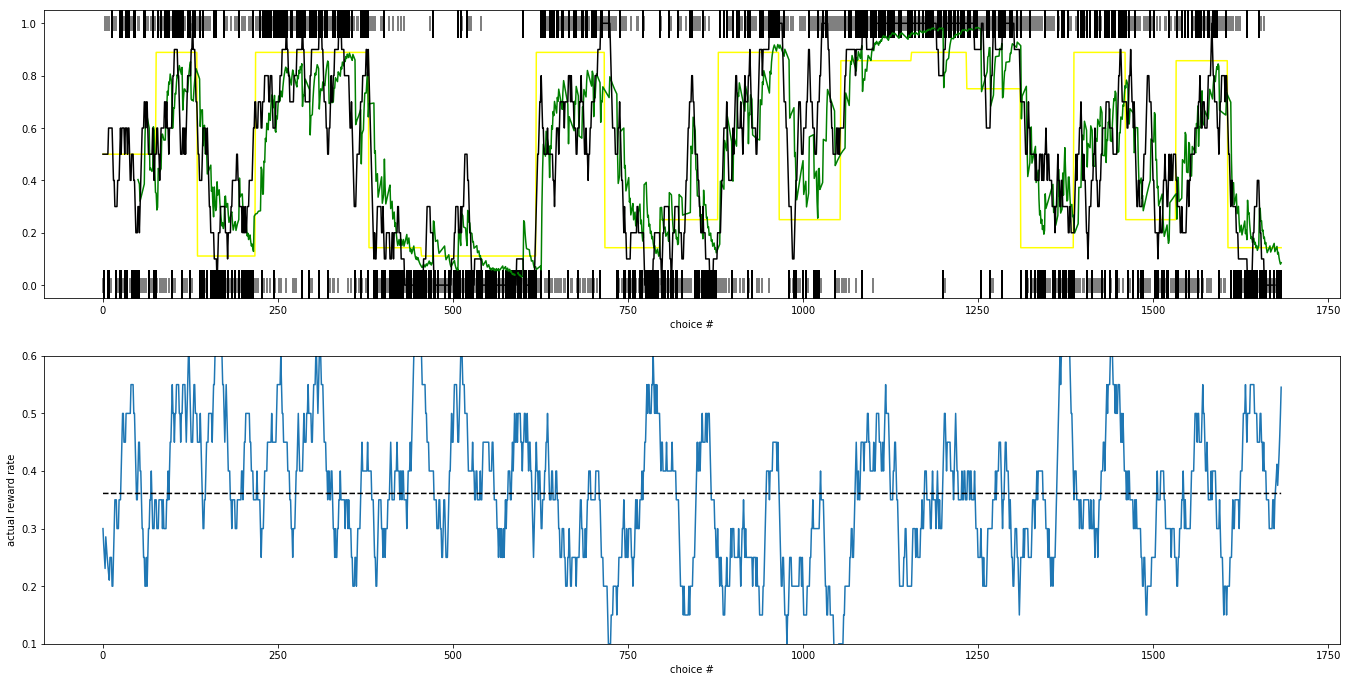

In [50]:
fig2=plt.figure()
ax21=fig2.add_axes([0,0,3,1])
ax21.plot(history_choicenum[history_reward==False], history_choice[history_reward==False],'|',color='gray',markersize=15,markeredgewidth=2)
ax21.plot(history_choicenum[history_reward==True], history_choice[history_reward==True],'k|',color='black',markersize=30,markeredgewidth=2)
# constant reward rate
ax21.plot(history_choicenum,history_rewardrate_constant,color='yellow')
#ax1.plot(history_choicenum,history_rewardrate_constant_actual,color='red')
ax21.plot(history_choicenum,history_rewardrate_dynamic,color='green')   
ax21.plot(moving_average(history_choice,10),color='black')
ax21.set_xlabel('choice #')

ax2=fig2.add_axes([0,-1.2,3,1])
ax2.plot(reward_rolling)#p_reward_actual
ax2.plot(np.ones(len(history_reward))*np.mean(history_reward),'k--')#p_reward_actual
plt.xlabel('choice #')
plt.ylabel('actual reward rate')
ax2.set_ylim(.1,.6)

In [78]:
%whos
history_choice.rolling()

Variable                                     Type         Data/Info
-------------------------------------------------------------------
accumulated_rewards                          int          0
accumulated_rewards_L                        int          1
accumulated_rewards_R                        int          0
ax1                                          Axes         Axes(0,0;1x1)
ax2                                          Axes         Axes(1.3,0;1x1)
ax3                                          Axes         Axes(0,-1.3;1x1)
ax4                                          Axes         Axes(1.3,-1.3;1x1)
ax5                                          Axes         Axes(0,-2.6;1x1)
ax6                                          Axes         Axes(1.3,-2.6;1x1)
block_idx_edges                              ndarray      9: 9 elems, type `int64`, 72 bytes
blocki                                       int          7
blocknum                                     int64        92
choice              

AttributeError: 'numpy.ndarray' object has no attribute 'rolling'